## Outline:

1. data cleaning and preprocessing 
2. best month for sales
3. which city sells the most 
4. which product is sold the most 
5. sales trends of top products
6. most set sales 

## 1. Read data from Feather

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Feather是一种二进制数据格式，用于在数据科学和计算中快速、轻松地传递数据。它是一种跨语言的列式数据存储格式，旨在提供高性能的读写速度。Feather最初由Apache Arrow项目开发，并被多个数据科学工具和编程语言支持，包括Python、R和Julia。

In [2]:
!pip install pyarrow

In [3]:
all_data = pd.read_feather('Sales_data.ftr')

In [4]:
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Data cleaning and formatting

In [5]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
all_data = all_data.dropna(how='all')

In [8]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
all_data.duplicated().sum()

618

In [10]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [11]:
all_data = all_data.drop_duplicates()

In [12]:
all_data.shape

(185687, 6)

In [13]:
all_data.duplicated().sum()

0

## 2. Which is the best month for sale

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [15]:
from datetime import datetime

In [20]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

In [24]:
all_data['Month'] = all_data['Order Date'].dt.month

In [29]:
all_data['Month'].unique()

array([ 4.,  5., nan,  8.,  9., 12.,  1.,  2.,  3.,  7.,  6., 11., 10.])

In [33]:
nanrows = all_data[all_data['Month'].isnull()]
nanrows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN


In [34]:
all_data.shape

(185687, 7)

In [36]:
all_data = all_data[all_data['Month'].notnull()]

In [37]:
all_data.shape

(185686, 7)

In [38]:
all_data['Month']=all_data['Month'].astype('int')

/var/folders/yq/ydzlznds3zj3dgv3kvj8_4f80000gn/T/ipykernel_21519/142658464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']=all_data['Month'].astype('int')


In [39]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

In [40]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
all_data['Price Each'] = all_data['Price Each'].astype('float')

/var/folders/yq/ydzlznds3zj3dgv3kvj8_4f80000gn/T/ipykernel_21519/3915265257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
/var/folders/yq/ydzlznds3zj3dgv3kvj8_4f80000gn/T/ipykernel_21519/3915265257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = all_data['Price Each'].astype('float')


In [41]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

In [43]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

/var/folders/yq/ydzlznds3zj3dgv3kvj8_4f80000gn/T/ipykernel_21519/2752844932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


In [44]:
## use warnings package to get rid of any warnings ..

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [45]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


在 `all_data.groupby('Month')['sales'].sum()` 中，`reset_index` 的作用是将分组后的结果重新设置为 DataFrame，并将原来的索引列添加为新的列。这样做是为了方便后续对结果进行进一步处理或可视化，因为分组操作可能会使索引列失去其常规数据列的性质。

使得Month不用作为索引，而是独立的列。

In [53]:
sales_by_month = all_data.groupby('Month')['sales'].sum().reset_index(name='Monthly Sales')
sales_by_month

,Month,Monthly Sales
0,1,1821413.16
1,2,2200078.08
2,3,2804973.35
3,4,3389217.98
4,5,3150616.23
5,6,2576280.15
6,7,2646461.32
7,8,2241083.37
8,9,2094465.69
9,10,3734777.86


#### 显示全部的横轴刻度，plt.xticks(sales_by_month['Month'])

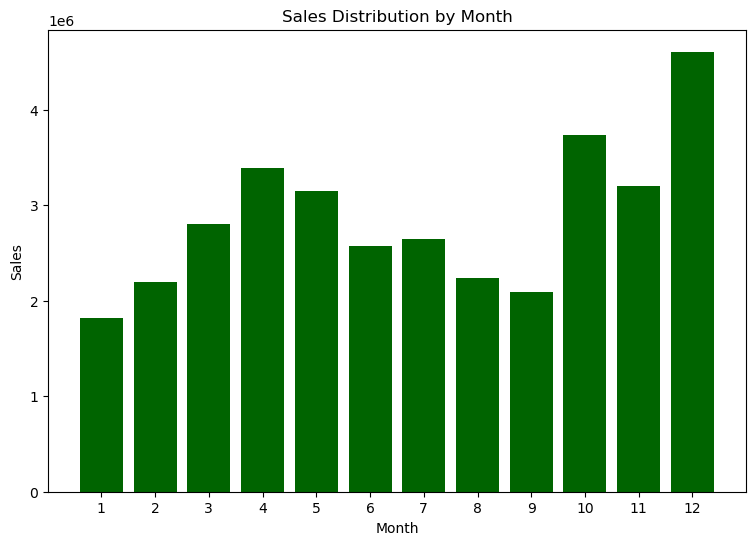

In [109]:
plt.figure(figsize=(9,6))
plt.title('Sales Distribution by Month')
plt.bar(sales_by_month['Month'],sales_by_month['Monthly Sales'], color = 'darkgreen' )
plt.xticks(sales_by_month['Month'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

#### Conclusion:

Decemeber is the best month for sales

## 3. Which city has the most orders 

In [62]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99


In [68]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str.get(1)

In [69]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [74]:
city_orders = pd.DataFrame(all_data['City'].value_counts().reset_index())
city_orders

,City,count
0,San Francisco,44662
1,Los Angeles,29564
2,New York City,24847
3,Boston,19901
4,Atlanta,14863
5,Dallas,14797
6,Seattle,14713
7,Portland,12449
8,Austin,9890


In [76]:
city_orders.shape

(9, 2)

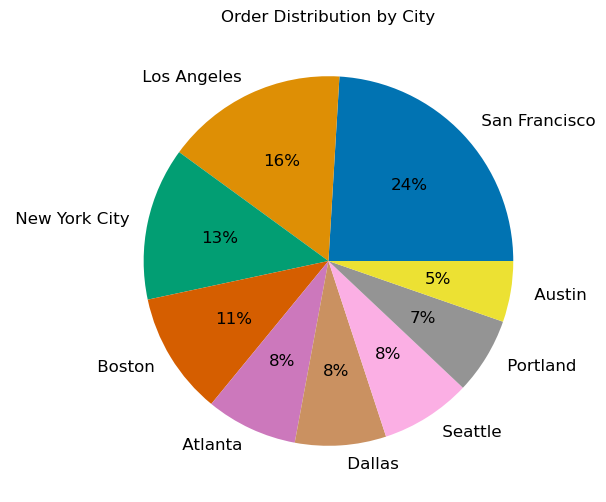

In [96]:
plt.figure(figsize=(9,6))
sns.set_palette('colorblind')
plt.title('Order Distribution by City')
plt.pie(city_orders['count'], 
        labels = city_orders['City'], 
        autopct = '%.0f%%', 
        textprops = {'fontsize':'12'})
plt.show()

#### Conclusion:
    
San Francisco, Los Angeles and New York City are the top 3 cities in terms of order numbers

## 4. What products are sold the most and why

In [97]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [99]:
count_df = all_data.groupby('Product').agg({'Quantity Ordered':'sum','Price Each':'mean'}).reset_index()
count_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


### How to Draw Bar and Line Chart

Text(0.5, 1.0, 'Product Distribution by Quantity and Price')

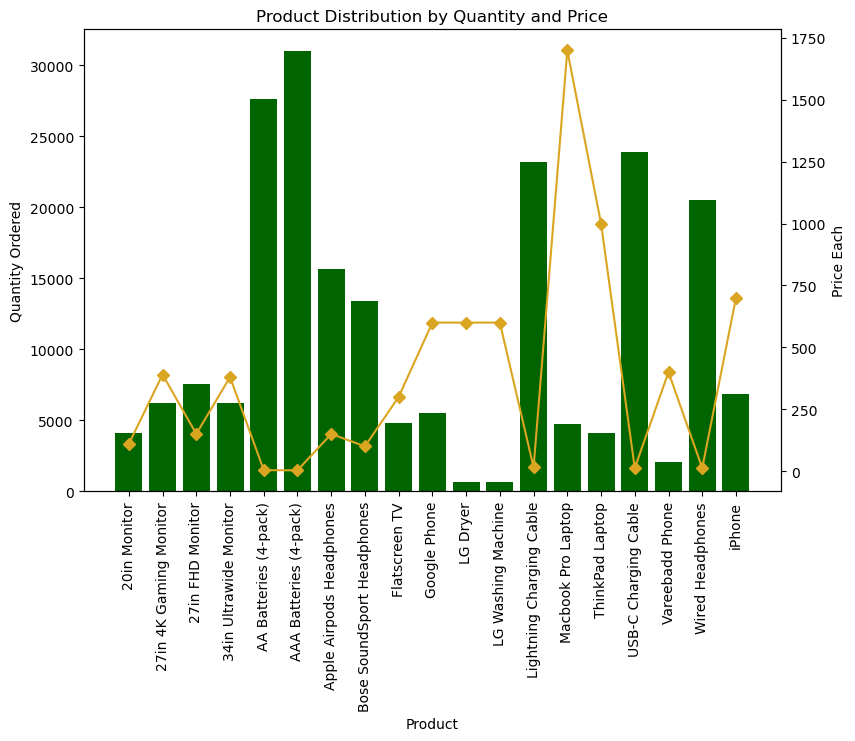

In [107]:
fig, ax1 = plt.subplots(figsize=(9,6))
ax2 = ax1.twinx()


ax1.bar(count_df['Product'],count_df['Quantity Ordered'], color = 'darkgreen')
ax2.plot(count_df['Product'],count_df['Price Each'], color = 'goldenrod', marker ='D')

ax1.set_xlabel('Product')
ax1.set_xticklabels(count_df['Product'], rotation=90)
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price Each')
ax1.set_title('Product Distribution by Quantity and Price')

#### Conclusion:
The top selling products is AAA Batteries (4-pack).\
The quantity sold of a product seems to closely related with its price.\
The cheapter the price is, the more units are sold.

## 5. The Sales Trend of the 5 Most Sold Products

In [120]:
top5_product = all_data['Product'].value_counts()[0:5].index
top5_product

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [121]:
all_data['Product'].isin(top5_product)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [122]:
top5_df = all_data[all_data['Product'].isin(top5_product)]
top5_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
186840,259349,AAA Batteries (4-pack),1,2.99,2019-09-01 22:14:00,"911 River St, Dallas, TX 75001",9,2.99,Dallas
186842,259350,USB-C Charging Cable,1,11.95,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,11.95,San Francisco
186844,259352,USB-C Charging Cable,1,11.95,2019-09-07 15:49:00,"976 Forest St, San Francisco, CA 94016",9,11.95,San Francisco
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles


In [123]:
top5_df.groupby(['Month','Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [124]:
pivot = top5_df.groupby(['Month','Product']).size().unstack()

Text(0, 0.5, 'Orders')

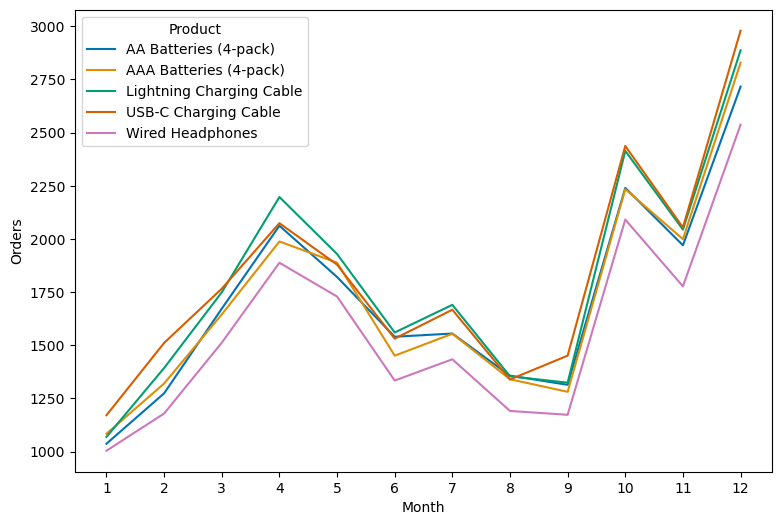

In [127]:
pivot.plot(figsize=(9,6))
plt.xticks(top5_df['Month'].unique())
plt.ylabel('Orders')

#### Conclusion:
    Most sales happen in April, October and December. 

## 6. What products are most often sold together

all_data['Order ID'].duplicated(keep=False) 返回一个布尔Series，表示'Order ID'列是否有重复值。keep=False表示将所有重复项都标记为True。

In [142]:
duplicated_df = all_data[all_data['Order ID'].duplicated(keep=False)]
duplicated_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [145]:
group_products = duplicated_df.groupby('Order ID')['Product'].apply(lambda x:','.join(x)).reset_index().rename(
    columns={'Product':'Grouped Products'})

In [147]:
group_products
# 购买多个产品的订单号，以及购买的产品

,Order ID,Grouped Products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [163]:
top5_group = group_products['Grouped Products'].value_counts()[0:10].sort_values().reset_index(name='Count')
top5_group

,Grouped Products,Count
0,"Vareebadd Phone,Bose SoundSport Headphones",60
1,"Google Phone,USB-C Charging Cable,Wired Headph...",79
2,"Vareebadd Phone,Wired Headphones",104
3,"Google Phone,Bose SoundSport Headphones",161
4,"iPhone,Apple Airpods Headphones",286
5,"Google Phone,Wired Headphones",303
6,"Vareebadd Phone,USB-C Charging Cable",312
7,"iPhone,Wired Headphones",361
8,"Google Phone,USB-C Charging Cable",857
9,"iPhone,Lightning Charging Cable",886


(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000')])

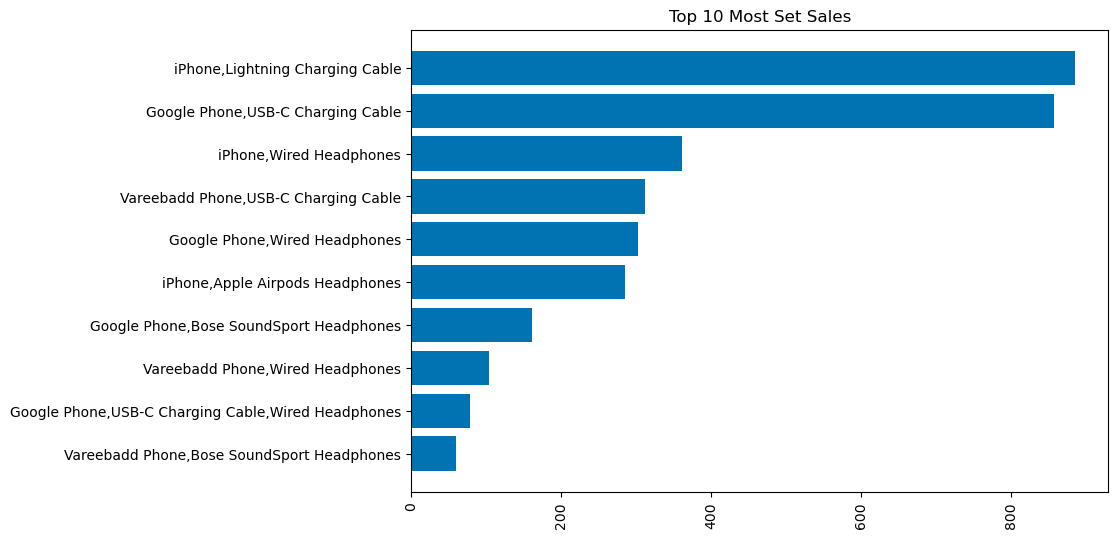

In [164]:
plt.figure(figsize=(9,6))
plt.title('Top 10 Most Set Sales')
plt.barh(top5_group['Grouped Products'], top5_group['Count'])
plt.xticks(rotation=90)

#### Conclusion:

The most popular product combination is iPhone & lightning charging cable, and google phone & USB-C charging cable.
So, when we could make recommendations as above when selling to consumers. 